In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
with open("startup_funding.csv") as file_obj:
    file_data = csv.DictReader(file_obj)
    
file_pd = pd.read_csv("startup_funding.csv", skipinitialspace = True)
df_1 = file_pd.copy()
df = file_pd.copy()

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


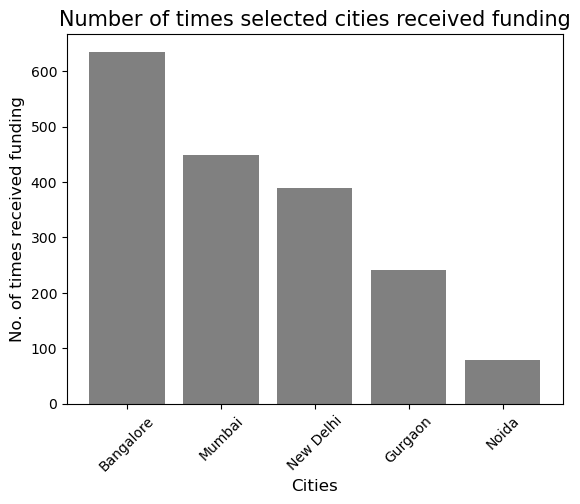

In [2]:
#for location problem

df_1.dropna(subset=["CityLocation"],inplace=True)
def separateCity(city): 
    return city.split('/')[0].strip() 
df_1['CityLocation']=df_1['CityLocation'].apply(separateCity) 
df_1[df_1['CityLocation'] == 'bangalore'] = 'Bangalore'
df_1[df_1['CityLocation'] == 'Delhi'] = 'New Delhi'

selected_city=['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']
a = df_1.loc[df_1['CityLocation'].isin(selected_city),'CityLocation'].value_counts()
a = list(a.items())
x = []
y = []
for i in range(len(a)):
    x.append(a[i][0])
    y.append(a[i][1])
    print(a[i][0], a[i][1])

np_x1=np.array(x)
np_y1=np.array(y)

np_x1=np_x1[np.argsort(np_y1)]
np_y1=np.sort(np_y1)

np_x1=np_x1[len(np_x1)-1::-1]
np_y1=np_y1[len(np_y1)-1::-1]

plt.bar(np_x1, np_y1, color='grey')
plt.xlabel('Cities', size = 12)
plt.ylabel('No. of times received funding', size = 12)
plt.title('Number of times selected cities received funding', size=15)
plt.xticks(rotation=45)
plt.show()

In [3]:
#for initial investment problem
#the top 5 investors who have invested maximum number of times
df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
            
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1

    
dct_keys = sorted(dct,key=dct.get,reverse=True)[0:5]
    
for i in dct_keys:
    print(i, dct[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


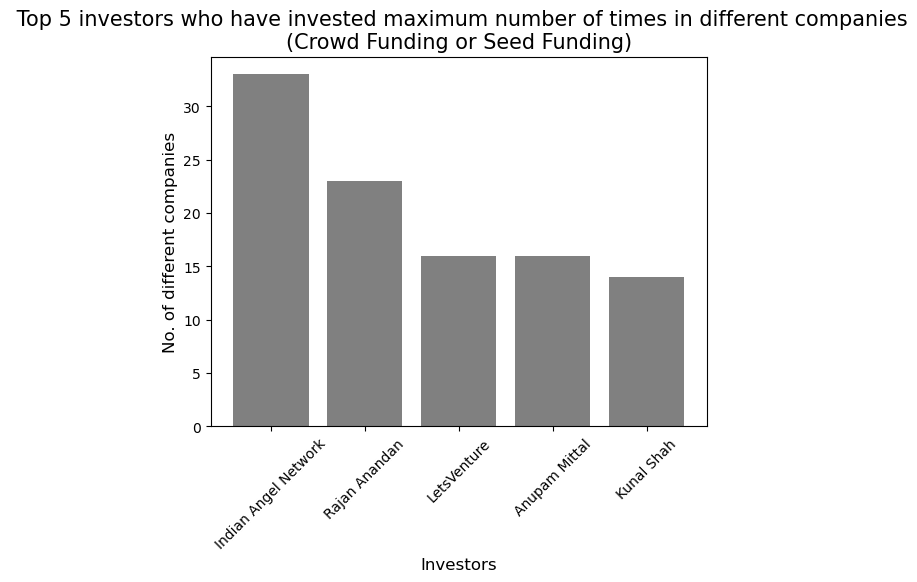

In [4]:
#for persisted investment problem
#the top 5 most probable investors with graph
df = file_pd.copy()

df=df[pd.notnull(df.InvestmentType)]
df.loc[df.InvestmentType=='SeedFunding', 'InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity', 'InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='DebtFunding', 'InvestmentType']='Debt Funding'
df.loc[df.InvestmentType=='Crowd funding', 'InvestmentType']='Crowd Funding'
df.reset_index(inplace=True, drop=True)
df=df[df.InvestmentType!='Private Equity']
df=df[df.InvestmentType!='Debt Funding']
df.reset_index(inplace=True, drop=True)

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
                    
                    
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic=dict()
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d=dict()
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])

x=[]
y=[]

for i in d.keys():
    x.append(i)
    y.append(d[i])
    
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

for i in range(len(np_x)):
    print(np_x[i], np_y[i])
    
plt.bar(np_x, np_y, color='grey')
plt.xlabel('Investors', size = 12)
plt.ylabel('No. of different companies', size = 12)
plt.title(' Top 5 investors who have invested maximum number of times in different companies\n(Crowd Funding or Seed Funding)', size=15)
plt.xticks(rotation=45)
plt.show()

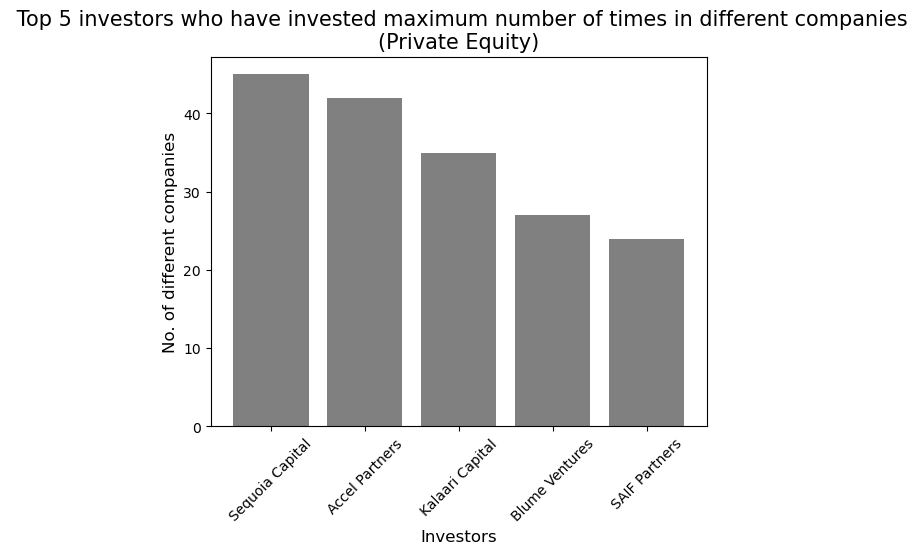

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [5]:
#for investment on expantion
#the top 5 private investors with graph
df = file_pd.copy()

df=df[pd.notnull(df.InvestmentType)]
df.loc[df.InvestmentType=='SeedFunding', 'InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity', 'InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='DebtFunding', 'InvestmentType']='Debt Funding'
df.loc[df.InvestmentType=='Crowd funding', 'InvestmentType']='Crowd Funding'
df.reset_index(inplace=True, drop=True)
df=df[df.InvestmentType!='Crowd Funding']
df=df[df.InvestmentType!='Debt Funding']
df=df[df.InvestmentType!='Seed Funding']

df.reset_index(inplace=True, drop=True)

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic=dict()
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d=dict()
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='grey')
plt.xlabel('Investors', size=12)
plt.ylabel('No. of different companies', size=12)
plt.title(' Top 5 investors who have invested maximum number of times in different companies\n(Private Equity)', size=15)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])